## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [2]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv("banknotes.csv")
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [3]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y
# Put your code here

data_xy = bank[["Bottom", "Top"]]
data_xy = data_xy.to_numpy()

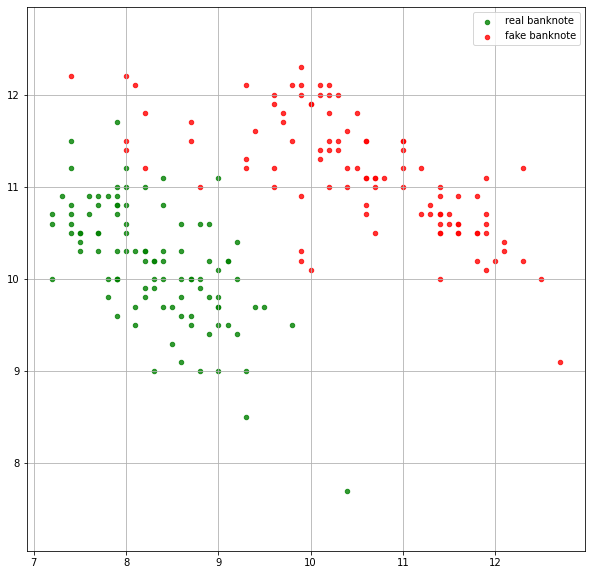

In [9]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label == 0)
index_1 = np.where(label == 1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.grid()
plt.scatter(data_xy[index_0, 0], data_xy[index_0, 1] ,s=20, alpha=0.8, c = "g", label="real banknote")
plt.scatter(data_xy[index_1, 0], data_xy[index_1, 1] ,s=20, alpha=0.8, c = "r", label="fake banknote")

plt.legend(("real banknote","fake banknote"),loc="upper right")
plt.axis('equal')
plt.show()
        

In [10]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here

m = data_xy.shape[0] # m=200
dist_sq = np.zeros((m, m))

for i in range(m):
  dist_sq[i, :] = np.sum((data_xy[i] - data_xy) ** 2, axis=1)
  np.abs(dist_sq)
    
# https://jaykmody.com/blog/distance-matrices-with-numpy/

In [11]:
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [15]:
def nearest_partition(dist_sq, K):
    
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # Put your code here
    k_nearest = np.argsort(dist_sq)[:, 1:K+1]      #np.argsort() return index from small to big
    
    return k_nearest


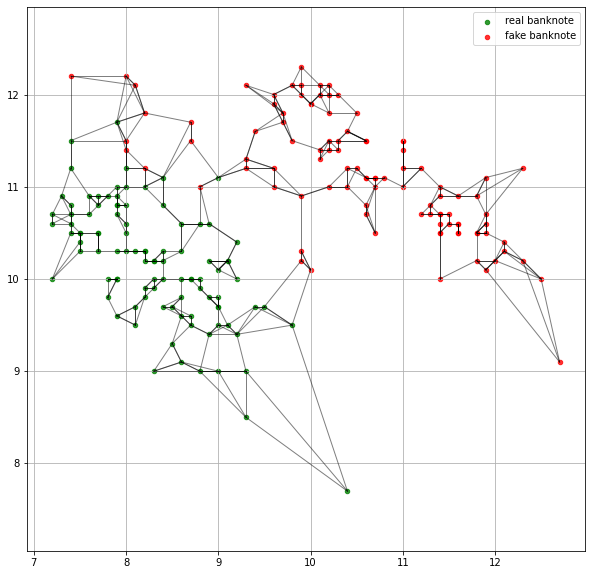

In [16]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label == 0)
index_1 = np.where(label == 1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.scatter(data_xy[index_0, 0], data_xy[index_0, 1] ,s=20, alpha=0.8, c = "g", label="real banknote")
plt.scatter(data_xy[index_1, 0], data_xy[index_1, 1] ,s=20, alpha=0.8, c = "r", label="fake banknote")

plt.grid()
plt.legend(("real banknote","fake banknote"),loc="upper right")
plt.axis('equal')

        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here
K = 3
nearest = nearest_partition(dist_sq, K)
m = data_xy.shape[0]
n = nearest.shape[1] # n = 3

for i in range(m):
    for j in range(n):       # nearest[i][j] is the data_xy's index
        plt.plot(*zip(data_xy[i], data_xy[nearest[i][j]]), color = 'black', linewidth=1, alpha=0.5)



(6.925, 12.975, 7.47, 12.530000000000001)

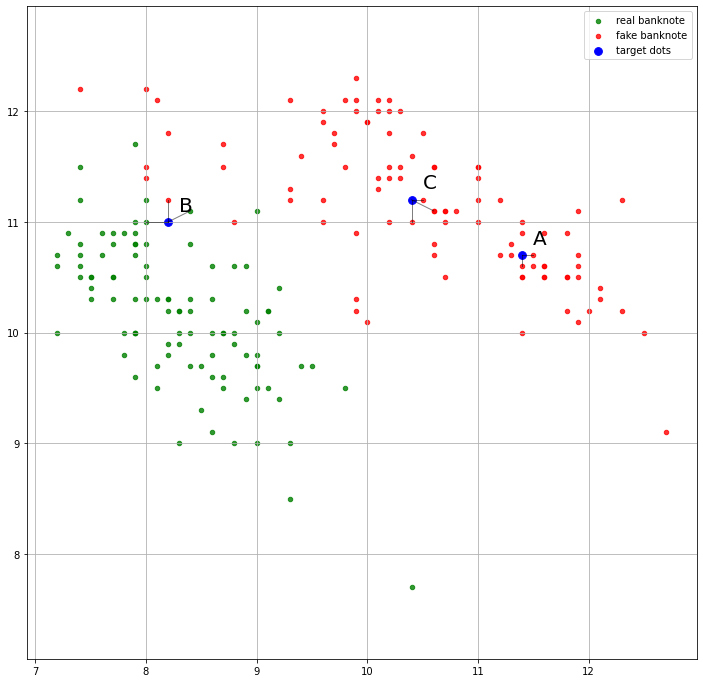

In [32]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']


# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label == 0)
index_1 = np.where(label == 1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (12, 12))

plt.scatter(data_xy[index_0, 0], data_xy[index_0, 1] ,s=20, alpha=0.8, c = "g", label="real banknote")
plt.scatter(data_xy[index_1, 0], data_xy[index_1, 1] ,s=20, alpha=0.8, c = "r", label="fake banknote")
plt.scatter(data_xy[target, 0], data_xy[target, 1], s=60, c = "b", label = "target dots") # Target dots
plt.legend(("real banknote","fake banknote","target dots"),loc="upper right")
plt.grid()
plt.axis("equal")

# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here

K = 3
nearest = nearest_partition(dist_sq, K)
m = data_xy.shape[0]
n = nearest.shape[1] # n = 3

# target = dot's index [146, 8, 109]
for i in range(n):
    for j in range(K):
        t = target[i]
        n = nearest[t]
        plt.plot(*zip(data_xy[t], data_xy[n[j]]), color = 'black', linewidth=1, alpha=0.5)


for i in range(len(text)):
    plt.annotate(text[i], (data_xy[target][i][0]+0.1, data_xy[target][i][1]+0.1), fontsize=20)   
    
plt.axis('equal')


### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer：A in red; B in green; C in red


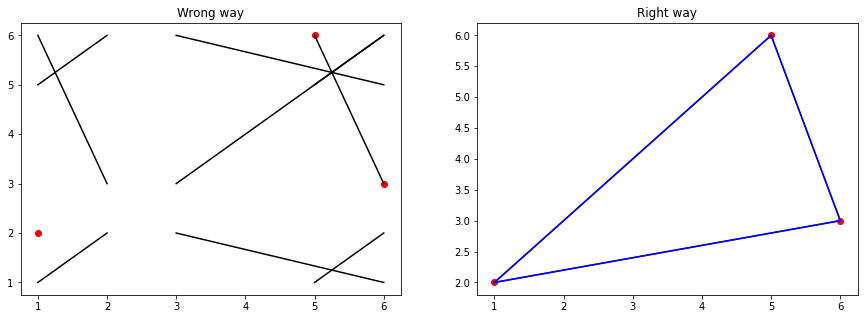

In [68]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')
        
        

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')